In [6]:
import pandas as pd
import math
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

filename = "Donnees_projet_fil_rouge.csv"
df = pd.read_csv(filename, header=0, sep=';')  # essayez d'abord avec point-virgule

print(f"Dataset Shape: {df.shape}")

print(df.columns)

Dataset Shape: (2756, 21)
Index(['Classe', 'Nom', 'MS % brut', 'PB % brut', 'CB % brut', 'MGR % brut',
       'MM % brut', 'NDF % brut', 'ADF % brut', 'Lignine % brut',
       'Amidon % brut', 'Sucres % brut', 'EB (kcal) kcal/kg brut',
       'ED porc croissance (kcal) kcal/kg brut',
       'EM porc croissance (kcal) kcal/kg brut',
       'EN porc croissance (kcal) kcal/kg brut',
       'EMAn coq (kcal) kcal/kg brut', 'EMAn poulet (kcal) kcal/kg brut',
       'UFL 2018 par kg brut', 'PDI 2018 g/kg brut',
       'BalProRu 2018 g/kg brut'],
      dtype='object')


In [2]:
print(df.head())

     Classe  Nom  MS % brut  PB % brut  CB % brut  MGR % brut  MM % brut  \
0  Céréales  Blé  90.800003        8.0        2.0         1.2        1.3   
1  Céréales  Blé  90.000000        8.0        1.9         1.2        1.4   
2  Céréales  Blé  89.000000        8.0        1.9         1.2        1.4   
3  Céréales  Blé  88.800003        8.0        1.9         1.2        1.4   
4  Céréales  Blé  88.500000        8.0        2.3         1.2        1.6   

   NDF % brut  ADF % brut  Lignine % brut  ...  Sucres % brut  \
0        11.4         2.8             0.9  ...            2.6   
1        11.0         2.7             0.9  ...            2.6   
2        10.9         2.7             0.9  ...            2.6   
3        10.9         2.7             0.9  ...            2.6   
4        12.5         3.2             1.0  ...            2.6   

   EB (kcal) kcal/kg brut  ED porc croissance (kcal) kcal/kg brut  \
0                    3900                                    3470   
1             

/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_84485/3394276808.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2', ax=ax)
/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_84485/3394276808.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2', ax=ax)
/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_84485/3394276808.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set2', bins=30, ax=ax)
/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_84485/3394276808.py:29: UserWarning: Ignoring `palette` b

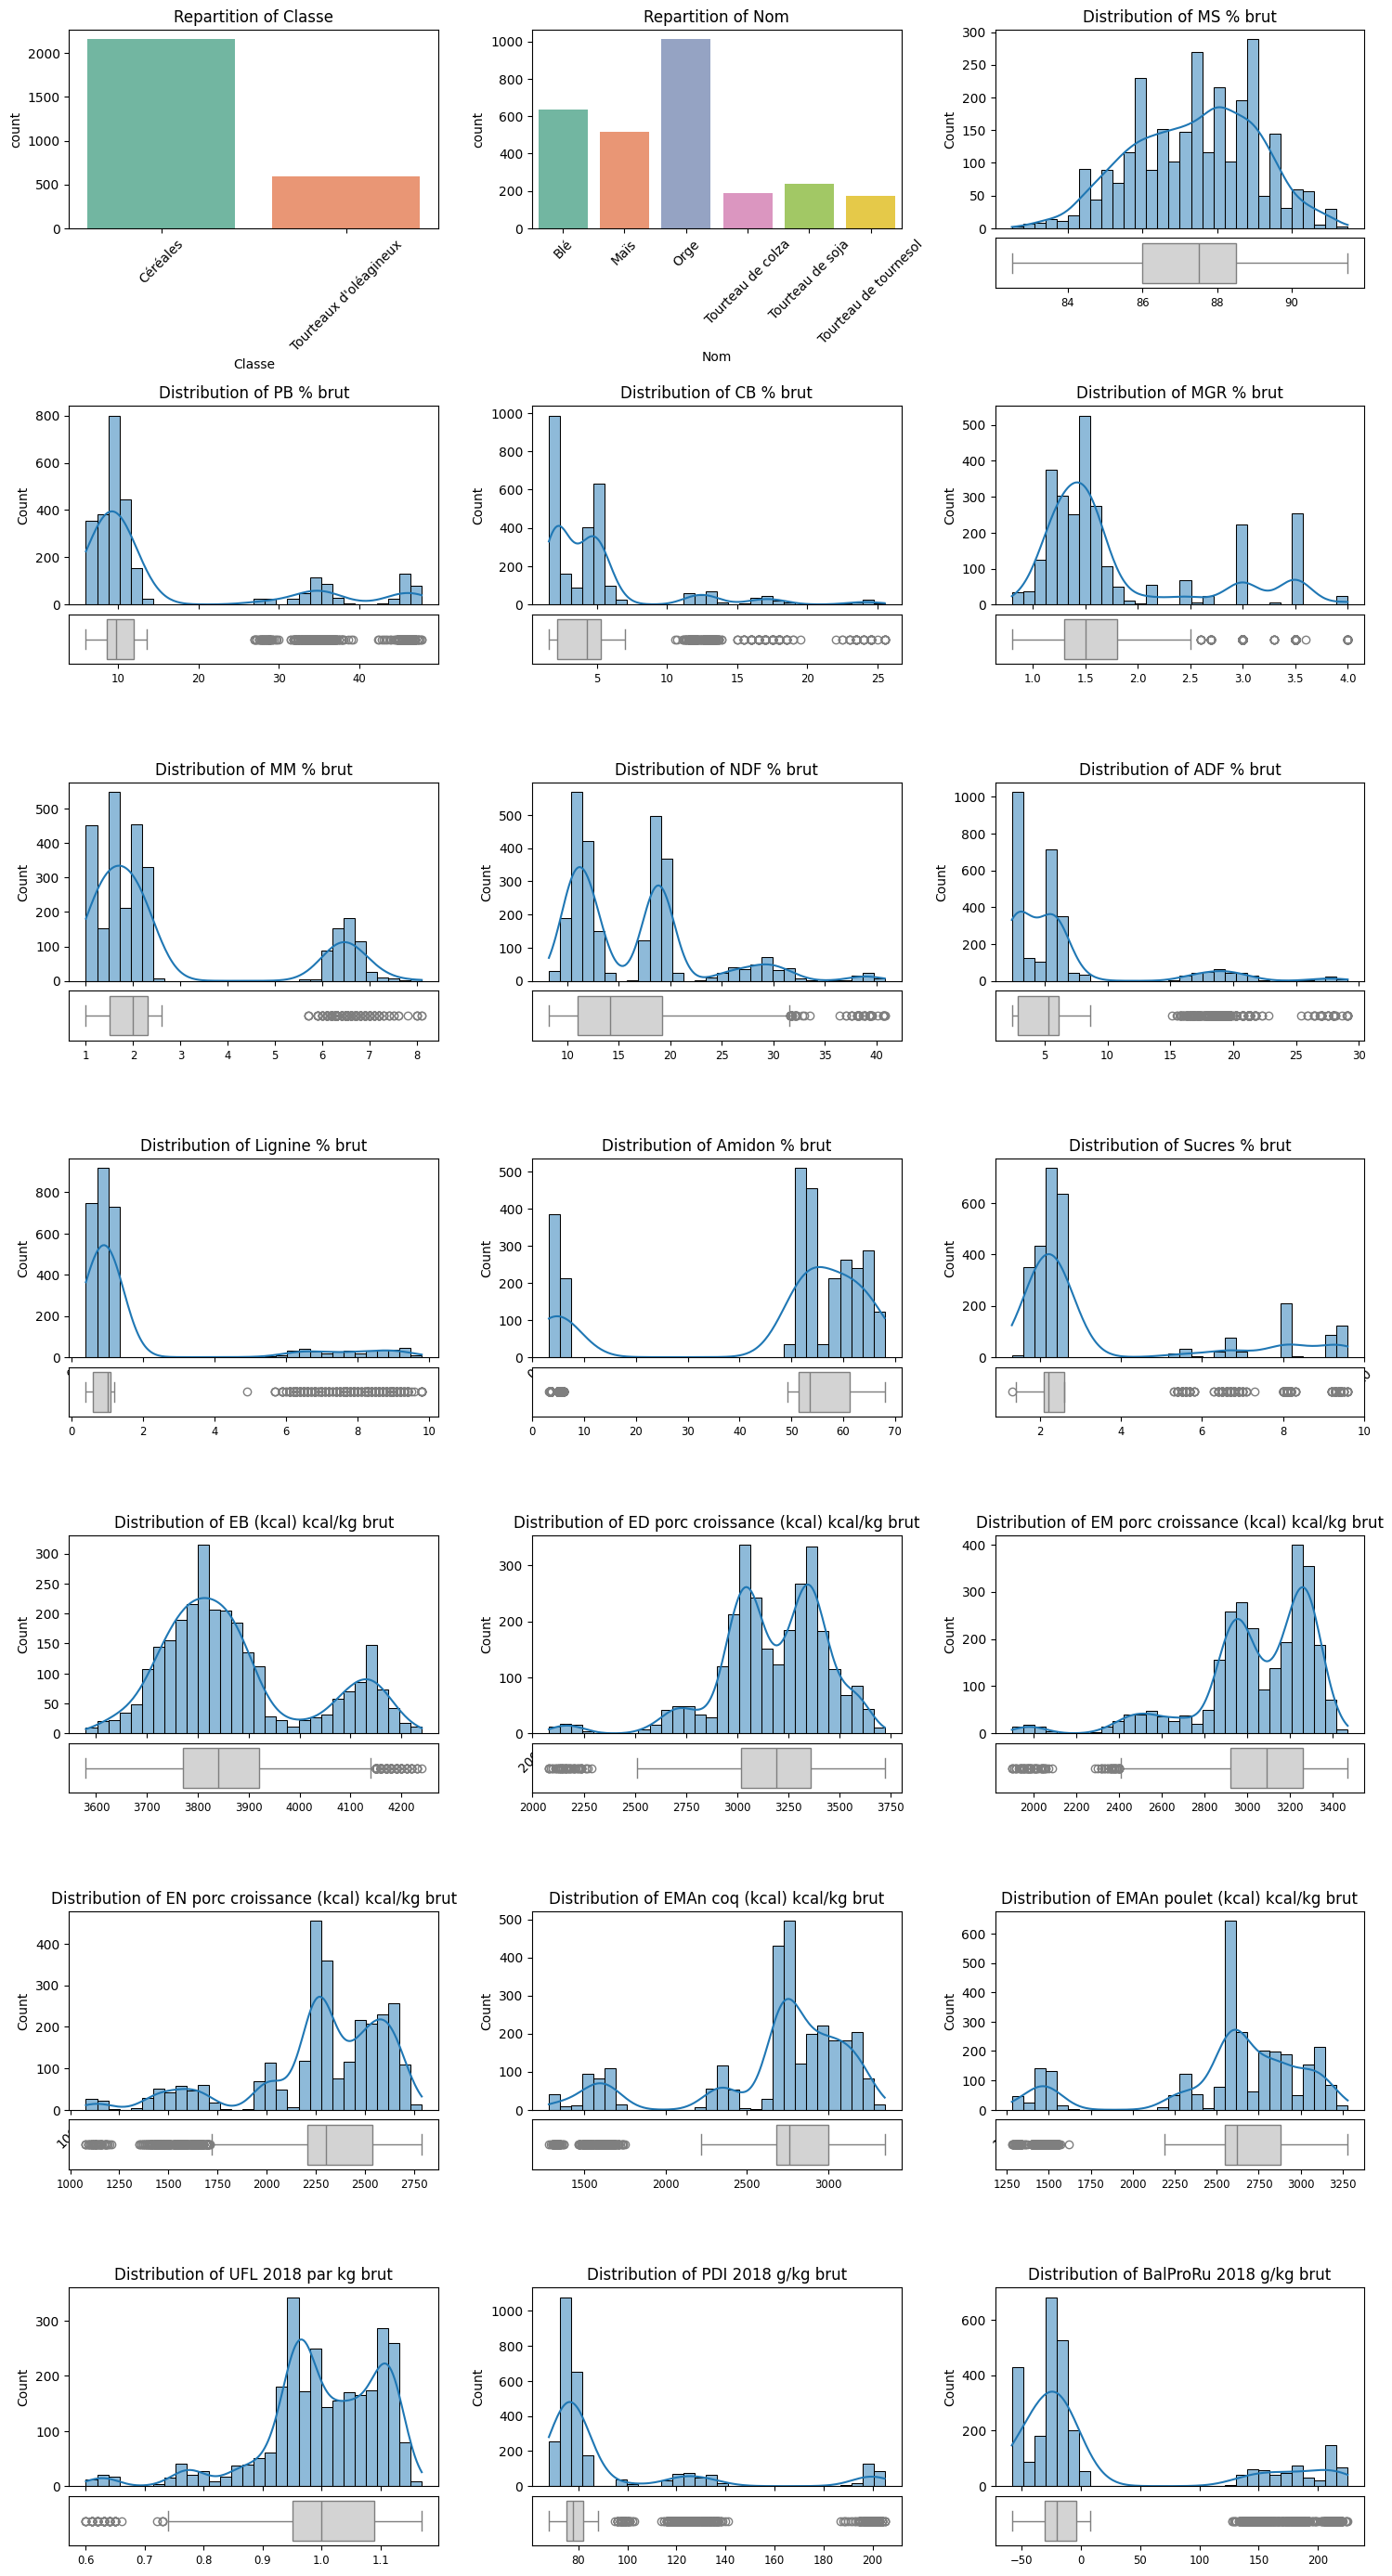

In [7]:



cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
all_cols = cat_cols + num_cols

if len(all_cols) == 0:
    print("Aucune colonne à afficher.")
else:
    ncols = 3
    ncols = min(ncols, len(all_cols))
    nrows = math.ceil(len(all_cols) / ncols)

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
    axs = axs.flatten()

    possible_hues = ['cereal', 'Cereal', 'class', 'Class', 'is_cereal']
    hue_col = next((h for h in possible_hues if h in df.columns), None)

    for i, column in enumerate(all_cols):
        ax = axs[i]
        if column in cat_cols:
            if hue_col is not None and hue_col != column:
                sns.countplot(data=df, x=column, hue=hue_col, palette='Set2', ax=ax)
                ax.legend(title=hue_col, loc='upper right', fontsize='small')
            else:
                sns.countplot(data=df, x=column, palette='Set2', ax=ax)
            ax.set_title(f'Repartition of {column}')
        else:
            # histogramme principal
            sns.histplot(data=df, x=column, kde=True, palette='Set2', bins=30, ax=ax)
            ax.set_title(f'Distribution of {column}')

            # inset: petite boxplot sous l'histogramme
            # ajuster le dernier nombre pour augmenter/diminuer la hauteur
            inset_ax = ax.inset_axes([0, -0.30, 1, 0.25])  # [left, bottom, width, height] en fraction de ax
            if hue_col is not None:
                # boxplot groupée par la colonne hue (affiche distribution par classe)
                sns.boxplot(x=hue_col, y=column, data=df, palette='Set2', ax=inset_ax)
                inset_ax.set_xlabel('')
                inset_ax.set_ylabel('')
            else:
                # boxplot simple (horizontale)
                sns.boxplot(x=column, data=df, orient='h', color='lightgrey', ax=inset_ax)
                inset_ax.set_xlabel('')
                inset_ax.set_yticks([])

            # lisibilité: réduire les labels et la taille de police
            inset_ax.tick_params(axis='x', rotation=0, labelsize='small')
            inset_ax.tick_params(axis='y', labelsize='small')

        ax.tick_params(axis='x', rotation=45)

    for j in range(len(all_cols), len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


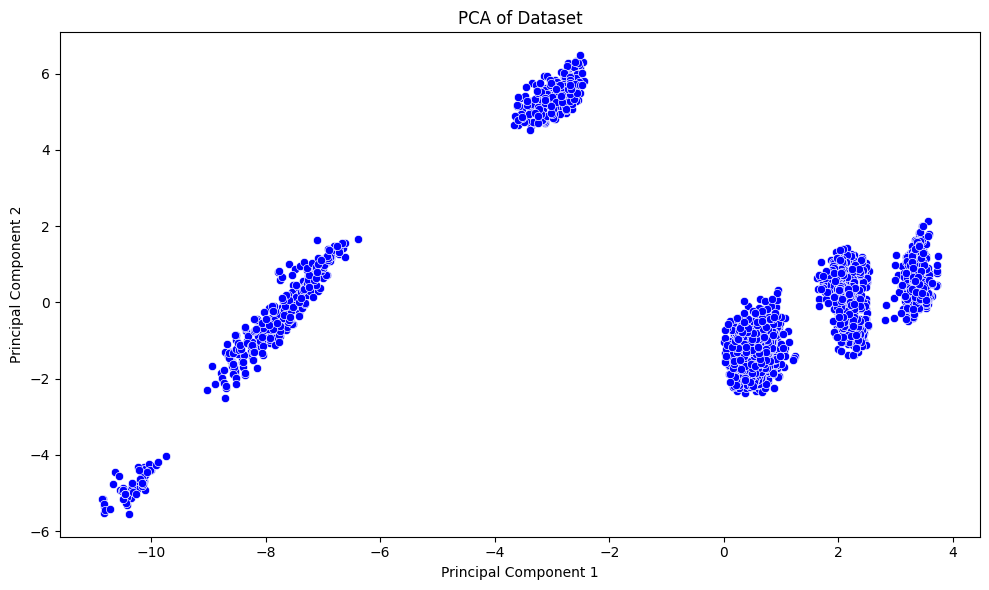

In [5]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA   
# Sélection des colonnes numériques pour la PCA
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
X = df[numeric_cols].dropna()  # Supprimer les lignes avec des valeurs manquantes
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
# Appliquer la PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X_scaled)
# Convertir en DataFrame pour une manipulation plus facile
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# Si une colonne de classe céréales existe, l'ajouter pour la coloration
if hue_col is not None:
    pca_df[hue_col] = df.loc[X.index, hue_col].values
# Visualiser les résultats de la PCA
plt.figure(figsize=(10, 6))
if hue_col is not None:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=hue_col, palette='Set2')
    plt.legend(title=hue_col)
else:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', color='blue')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

Mean Squared Error: 41.938777923583984
Mean Absolute Error: 4.852026462554932
R² Score: 0.9981748461723328


/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_84485/2415614230.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='Set2')


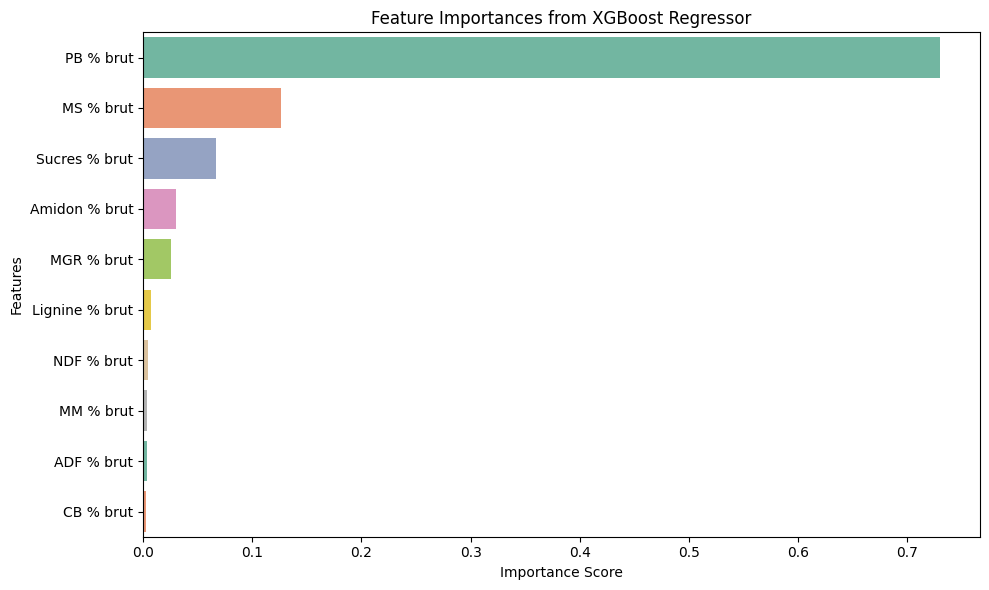

In [21]:
# training a simple model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

X = df[numeric_cols].dropna()
# Dropping row with target variables

X_mod = X.drop(columns=['EB (kcal) kcal/kg brut','ED porc croissance (kcal) kcal/kg brut',
       'EM porc croissance (kcal) kcal/kg brut',
       'EN porc croissance (kcal) kcal/kg brut',
       'EMAn coq (kcal) kcal/kg brut', 'EMAn poulet (kcal) kcal/kg brut',
       'UFL 2018 par kg brut', 'PDI 2018 g/kg brut',
       'BalProRu 2018 g/kg brut'], errors='ignore') 

y = df['EB (kcal) kcal/kg brut']  # Assurez-vous que y correspond à X
    
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=42)
    
# Entraîner un modèle XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)
    
# Faire des prédictions
y_pred = model.predict(X_test)
    
# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# graphique d'importance des caractéristiques
importances = model.feature_importances_
feature_names = X_mod.columns   
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='Set2')
plt.title('Feature Importances from XGBoost Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()